In [1]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers.core import Dense,Activation, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
# Read dataset to pandas dataframe
df = pd.read_csv('premierleague.csv') 

In [5]:
df.head()


,Unnamed: 0,Column1,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,Winner
0,0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,...,20,4,0,0,1,2,2,1,2014,Away
1,1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,...,9,1,0,0,2,2,2,2,2014,Draw
2,2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,...,10,1,0,0,2,2,2,2,2014,Draw
3,3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,...,10,0,0,1,0,1,1,0,2014,Away
4,4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,...,10,2,0,0,0,1,1,0,2014,Away


In [6]:
print(df.shape)
print(len(df))

(2660, 43)
2660


In [7]:
team1 = 'MAN UTD'
team2 = 'LIVERPOOL'

In [9]:
twoTeams = df[((df['Home Team'] == team1) & (df['Away Team'] == team2)) | (df['Home Team'] == team2) & (df['Away Team'] == team1)]
twoTeams

,Unnamed: 0,Column1,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,Winner
157,157,157,MAN UTD,LIVERPOOL,3-0,2-0,6.5,7.6,5.6,55,...,14,3,0,0,3,0,0,3,2014,Home
297,297,297,LIVERPOOL,MAN UTD,1-2,0-1,5.5,5.5,7.2,42,...,17,2,0,0,1,2,2,1,2014,Away
426,426,426,MAN UTD,LIVERPOOL,3-1,0-0,6.4,7.5,5.6,56,...,11,2,0,0,3,1,1,3,2015,Home
597,597,597,LIVERPOOL,MAN UTD,0-1,0-0,3.5,6.5,6.9,53,...,18,2,0,0,0,1,1,0,2015,Away
839,839,839,LIVERPOOL,MAN UTD,0-0,0-0,1.9,6.9,6.8,65,...,20,4,0,0,0,0,0,0,2016,Draw
969,969,969,MAN UTD,LIVERPOOL,1-1,0-1,4.7,6.3,7.0,56,...,13,3,0,0,1,1,1,1,2016,Draw
1210,1210,1210,LIVERPOOL,MAN UTD,0-0,0-0,2.6,7.0,6.1,62,...,13,2,0,0,0,0,0,0,2017,Draw
1430,1430,1430,MAN UTD,LIVERPOOL,2-1,2-0,5.1,6.9,6.1,32,...,16,1,0,0,2,1,1,2,2017,Home
1689,1689,1689,LIVERPOOL,MAN UTD,3-1,1-1,7.1,8.0,5.2,64,...,14,2,0,0,3,1,1,3,2018,Home
1788,1788,1788,MAN UTD,LIVERPOOL,0-0,0-0,2.0,6.6,6.1,35,...,17,3,0,0,0,0,0,0,2018,Draw


In [14]:
#take only important data
finaldata = twoTeams.iloc[:,2:4]
finaldata['Home Team Goals Scored'] = twoTeams['Home Team Goals Scored']
finaldata['Away Team Goals Scored'] = twoTeams['Away Team Goals Scored']
finaldata['Home Team Possession %'] = twoTeams['Home Team Possession %']
finaldata['Home Team Rating'] = twoTeams['Home Team Rating']
finaldata['Away Team Rating'] = twoTeams['Away Team Rating']
finaldata['Winner'] = twoTeams['Winner']

finaldata

,Home Team,Away Team,Home Team Goals Scored,Away Team Goals Scored,Home Team Possession %,Home Team Rating,Away Team Rating,Winner
157,MAN UTD,LIVERPOOL,3,0,55,7.6,5.6,Home
297,LIVERPOOL,MAN UTD,1,2,42,5.5,7.2,Away
426,MAN UTD,LIVERPOOL,3,1,56,7.5,5.6,Home
597,LIVERPOOL,MAN UTD,0,1,53,6.5,6.9,Away
839,LIVERPOOL,MAN UTD,0,0,65,6.9,6.8,Draw
969,MAN UTD,LIVERPOOL,1,1,56,6.3,7.0,Draw
1210,LIVERPOOL,MAN UTD,0,0,62,7.0,6.1,Draw
1430,MAN UTD,LIVERPOOL,2,1,32,6.9,6.1,Home
1689,LIVERPOOL,MAN UTD,3,1,64,8.0,5.2,Home
1788,MAN UTD,LIVERPOOL,0,0,35,6.6,6.1,Draw


In [15]:
#polish data
finaldata['Home Team'] = finaldata['Home Team'].replace([team1],1)
finaldata['Home Team'] = finaldata['Home Team'].replace([team2],0)

finaldata['Away Team'] = finaldata['Away Team'].replace([team1],1)
finaldata['Away Team'] = finaldata['Away Team'].replace([team2],0)

finaldata['Winner'] = finaldata['Winner'].replace(['Home'],1)
finaldata['Winner'] = finaldata['Winner'].replace(['Away'],-1)
finaldata['Winner'] = finaldata['Winner'].replace(['Draw'],0)


finaldata

,Home Team,Away Team,Home Team Goals Scored,Away Team Goals Scored,Home Team Possession %,Home Team Rating,Away Team Rating,Winner
157,1,0,3,0,55,7.6,5.6,1
297,0,1,1,2,42,5.5,7.2,-1
426,1,0,3,1,56,7.5,5.6,1
597,0,1,0,1,53,6.5,6.9,-1
839,0,1,0,0,65,6.9,6.8,0
969,1,0,1,1,56,6.3,7.0,0
1210,0,1,0,0,62,7.0,6.1,0
1430,1,0,2,1,32,6.9,6.1,1
1689,0,1,3,1,64,8.0,5.2,1
1788,1,0,0,0,35,6.6,6.1,0


In [16]:
#dataset col
x = finaldata.iloc[:, :-1].values 
#dataset labels
y = finaldata.iloc[:, -1].values

In [17]:
print(x)
print(y)

[[ 1.   0.   3.   0.  55.   7.6  5.6]
 [ 0.   1.   1.   2.  42.   5.5  7.2]
 [ 1.   0.   3.   1.  56.   7.5  5.6]
 [ 0.   1.   0.   1.  53.   6.5  6.9]
 [ 0.   1.   0.   0.  65.   6.9  6.8]
 [ 1.   0.   1.   1.  56.   6.3  7. ]
 [ 0.   1.   0.   0.  62.   7.   6.1]
 [ 1.   0.   2.   1.  32.   6.9  6.1]
 [ 0.   1.   3.   1.  64.   8.   5.2]
 [ 1.   0.   0.   0.  35.   6.6  6.1]
 [ 1.   0.   1.   1.  32.   6.2  7. ]
 [ 0.   1.   2.   0.  53.   7.1  5.9]
 [ 0.   1.   0.   0.  66.   6.3  6.8]
 [ 1.   0.   2.   4.  53.   5.   7.7]]
[ 1 -1  1 -1  0  0  0  1  1  0  0  1  0 -1]


In [18]:
(trainX, testX, trainY, testY) = train_test_split(x,y, test_size=0.2)

In [ ]:
# define the keras model
model = Sequential()

#The model expects rows of data with 8 variables (the input_dim=8 argument)
#The first hidden layer has 12 nodes and uses the relu activation function.
model.add(Dense(24, input_dim=8, activation='relu'))
#The second hidden layer has 8 nodes and uses the relu activation function.
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
#model.add(Dropout(0.2))
#The output layer has one node and uses the sigmoid activation function.
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 24)                216       
                                                                 
 dense_15 (Dense)            (None, 12)                300       
                                                                 
 dense_16 (Dense)            (None, 6)                 78        
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
sgd = SGD(lr=0.1)
adam = Adam()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# fit the keras model on the dataset
history = model.fit(trainX, trainY, epochs=100, validation_data=[testX, testY], batch_size=32)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 1.6229 - accuracy: 0.4919 - val_loss: 0.9377 - val_accuracy: 0.6623
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8569 - accuracy: 0.6124 - val_loss: 0.7799 - val_accuracy: 0.6169
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7690 - accuracy: 0.6026 - val_loss: 0.7279 - val_accuracy: 0.6688
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.6384 - val_loss: 0.8028 - val_accuracy: 0.5974
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.6336 - val_loss: 0.9146 - val_accuracy: 0.6299
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7578 - accuracy: 0.6401 - val_loss: 0.7050 - val_accuracy: 0.6558
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6596 - val_loss: 0.6955 - val_accuracy: 0.6688
Epoch 8/100


In [ ]:
y_predict=model.predict(testX)

In [ ]:
y_predict

array([[0.1436137 ],
       [0.0941155 ],
       [0.4834761 ],
       [0.9462521 ],
       [0.13919535],
       [0.61245465],
       [0.08108062],
       [0.10065684],
       [0.13627574],
       [0.23123369],
       [0.204763  ],
       [0.25644535],
       [0.12180591],
       [0.06325588],
       [0.38905862],
       [0.1204896 ],
       [0.18118057],
       [0.33536303],
       [0.2918263 ],
       [0.05369785],
       [0.20946953],
       [0.17085451],
       [0.47144043],
       [0.27531946],
       [0.4350966 ],
       [0.12373406],
       [0.2042597 ],
       [0.29792655],
       [0.03256825],
       [0.5338328 ],
       [0.26494694],
       [0.16986701],
       [0.07780898],
       [0.5800956 ],
       [0.1922532 ],
       [0.3751257 ],
       [0.32849658],
       [0.1677717 ],
       [0.16962111],
       [0.99401   ],
       [0.07461369],
       [0.36710775],
       [0.17937875],
       [0.0488655 ],
       [0.18466163],
       [0.19659516],
       [0.04945073],
       [0.178

In [ ]:
testY

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

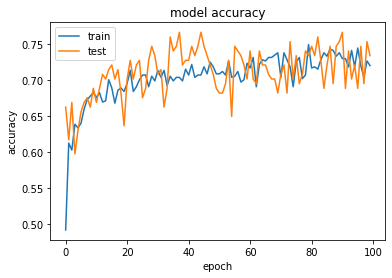

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()